In [1]:
import os
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 
import time 
import gpytorch
from gpytorch.functions import pivoted_cholesky

from gpytorch.kernels import ScaleKernel, MaternKernel, RBFKernel
from gpytorch.priors import GammaPrior
from gpytorch.likelihoods import GaussianLikelihood
import torch
import gc

gc.collect()
torch.cuda.empty_cache()
torch.cuda.ipc_collect()
# Set device and global dtype
device = "cuda:0"
global_dtype = torch.float32

# Ensure reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Add project source path
notebook_dir = os.getcwd()
src_path = os.path.abspath(os.path.join(notebook_dir, '../code'))
if src_path not in sys.path:
    sys.path.append(src_path)

# Import custom modules
from gps import CholeskyGaussianProcess, IterativeGaussianProcess
from util import train, eval, plot_gpr_results, fetch_uci_dataset, memory_dump
from plotting import plot_gp_simple, plot_gp_sample, plot_gp_simple_regions

# Enable autoreloading of modules
%load_ext autoreload
%autoreload 2
train_x, train_y, test_x, test_y = fetch_uci_dataset('bike',r"C:\Users\fredw\chris\Research\softki\data\uci_datasets\uci_datasets\elevators\data.csv",train_frac=1/10,val_frac=0)
train_x = train_x.to(device)
train_y = train_y.to(device)
test_x = test_x.to(device)
print(train_x.shape)

[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode
SIZE (16599, 19)
Dataset loaded
torch.Size([1659, 17])


  0%|          | 0/20 [00:00<?, ?it/s]c:\Users\fredw\chris\Research\RandomIterativeGP\randomGP2\code\gps.py:353: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3687.)
  quadratic = y.T @ self.alpha
  5%|▌         | 1/20 [00:00<00:09,  2.10it/s]

tensor(2009.7947, device='cuda:0', grad_fn=<MulBackward0>)


 10%|█         | 2/20 [00:00<00:08,  2.14it/s]

tensor(2001.2462, device='cuda:0', grad_fn=<MulBackward0>)


 15%|█▌        | 3/20 [00:01<00:07,  2.31it/s]

tensor(1994.1918, device='cuda:0', grad_fn=<MulBackward0>)


 20%|██        | 4/20 [00:01<00:06,  2.31it/s]

tensor(1987.1941, device='cuda:0', grad_fn=<MulBackward0>)


 25%|██▌       | 5/20 [00:02<00:06,  2.25it/s]

tensor(1978.3271, device='cuda:0', grad_fn=<MulBackward0>)


 30%|███       | 6/20 [00:02<00:06,  2.28it/s]

tensor(1970.9805, device='cuda:0', grad_fn=<MulBackward0>)


 35%|███▌      | 7/20 [00:03<00:05,  2.27it/s]

tensor(1964.7595, device='cuda:0', grad_fn=<MulBackward0>)


 40%|████      | 8/20 [00:03<00:05,  2.25it/s]

tensor(1954.9454, device='cuda:0', grad_fn=<MulBackward0>)


 45%|████▌     | 9/20 [00:04<00:04,  2.23it/s]

tensor(1946.2673, device='cuda:0', grad_fn=<MulBackward0>)


 50%|█████     | 10/20 [00:04<00:04,  2.17it/s]

tensor(1937.2444, device='cuda:0', grad_fn=<MulBackward0>)


 55%|█████▌    | 11/20 [00:05<00:04,  2.06it/s]

tensor(1930.6182, device='cuda:0', grad_fn=<MulBackward0>)


 60%|██████    | 12/20 [00:05<00:03,  2.01it/s]

tensor(1922.3062, device='cuda:0', grad_fn=<MulBackward0>)


 65%|██████▌   | 13/20 [00:06<00:03,  1.92it/s]

tensor(1914.1826, device='cuda:0', grad_fn=<MulBackward0>)


 70%|███████   | 14/20 [00:06<00:03,  1.89it/s]

tensor(1905.1895, device='cuda:0', grad_fn=<MulBackward0>)


 75%|███████▌  | 15/20 [00:07<00:02,  1.85it/s]

tensor(1895.3179, device='cuda:0', grad_fn=<MulBackward0>)


 80%|████████  | 16/20 [00:07<00:02,  1.80it/s]

tensor(1888.9354, device='cuda:0', grad_fn=<MulBackward0>)


 85%|████████▌ | 17/20 [00:08<00:01,  1.81it/s]

tensor(1877.7238, device='cuda:0', grad_fn=<MulBackward0>)


 90%|█████████ | 18/20 [00:08<00:01,  1.78it/s]

tensor(1869.3708, device='cuda:0', grad_fn=<MulBackward0>)


 95%|█████████▌| 19/20 [00:09<00:00,  1.73it/s]

tensor(1860.1044, device='cuda:0', grad_fn=<MulBackward0>)


100%|██████████| 20/20 [00:10<00:00,  1.69it/s]

tensor(1851.6622, device='cuda:0', grad_fn=<MulBackward0>)
Iter 20/20, Loss: 1851.6622


  0%|          | 0/20 [00:00<?, ?it/s]

tensor(2008.6356, device='cuda:0', grad_fn=<MulBackward0>)


 10%|█         | 2/20 [00:00<00:04,  3.62it/s]

tensor(2001.1506, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1993.5903, device='cuda:0', grad_fn=<MulBackward0>)


 20%|██        | 4/20 [00:00<00:02,  5.84it/s]

tensor(1985.9547, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1978.2446, device='cuda:0', grad_fn=<MulBackward0>)


 35%|███▌      | 7/20 [00:01<00:01,  7.35it/s]

tensor(1970.4507, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1962.5835, device='cuda:0', grad_fn=<MulBackward0>)


 45%|████▌     | 9/20 [00:01<00:01,  8.17it/s]

tensor(1954.6320, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1946.5991, device='cuda:0', grad_fn=<MulBackward0>)


 50%|█████     | 10/20 [00:01<00:01,  7.90it/s]

tensor(1938.4769, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1930.2734, device='cuda:0', grad_fn=<MulBackward0>)


 65%|██████▌   | 13/20 [00:01<00:00,  8.42it/s]

tensor(1921.9814, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1913.6058, device='cuda:0', grad_fn=<MulBackward0>)


 70%|███████   | 14/20 [00:02<00:00,  8.53it/s]

tensor(1905.1360, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1896.5784, device='cuda:0', grad_fn=<MulBackward0>)


 80%|████████  | 16/20 [00:02<00:00,  8.57it/s]

tensor(1887.9377, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1879.1946, device='cuda:0', grad_fn=<MulBackward0>)


 90%|█████████ | 18/20 [00:02<00:00,  8.26it/s]

tensor(1870.3607, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1861.4392, device='cuda:0', grad_fn=<MulBackward0>)


100%|██████████| 20/20 [00:02<00:00,  7.31it/s]


tensor(1852.4202, device='cuda:0', grad_fn=<MulBackward0>)
Iter 20/20, Loss: 1852.4202


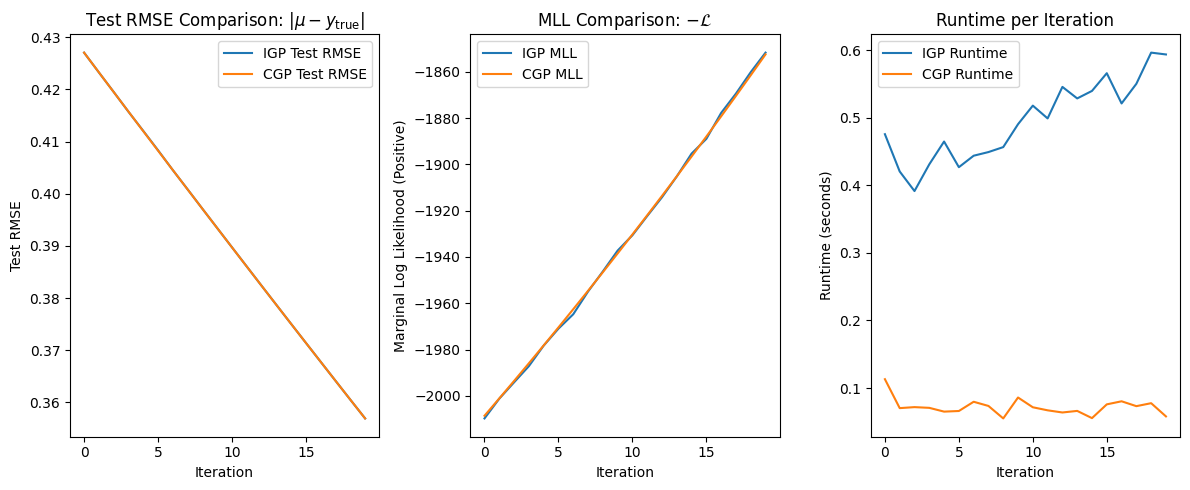

In [2]:
import time
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

def train(model, train_x, train_y, test_x, test_y, training_iterations=100, lr=0.1):
    optimizer = torch.optim.Adam([
        {'params': model.kernel.parameters()}, 
        {'params': [model.noise.u]}  # Use raw_value instead of noise()
    ], lr=lr)
    
    runtime_log, mll_loss_log, test_rmse_log = [], [], []
    
    for i in tqdm(range(training_iterations)):
        start_time = time.time()
        
        optimizer.zero_grad()
        model.fit(train_x, train_y)
        loss = model.compute_mll(train_y)
        print(loss)
        
        torch.autograd.set_detect_anomaly(True)
        loss.backward()
        optimizer.step()
        
        mean, covar = model.predict(test_x)
        
        total_time = time.time() - start_time
        runtime_log.append(total_time)
        mll_loss_log.append(-loss.item())  # Logging positive MLL value
        
        test_rmse = torch.mean(torch.abs(mean.detach().cpu()- test_y)).item()
        test_rmse_log.append(test_rmse)
        
        if (i + 1) % 20 == 0:
            print(f'Iter {i+1}/{training_iterations}, Loss: {loss.item():.4f}')
    
    return model, runtime_log, mll_loss_log, test_rmse_log, mean, covar

# Example usage:
# Assuming that model_igp and model_cgp are instantiated GP models (Iterative GP and Cholesky GP respectively),
# and train_x, train_y, test_x, test_y are already defined.
base_kernel = MaternKernel(ard_num_dims=train_x.shape[-1], lengthscale_prior=GammaPrior(3.0, 6.0), nu=1.5)
kernel = ScaleKernel(base_kernel, outputscale_prior=GammaPrior(2.0, 0.15)).to(device)

cgp = CholeskyGaussianProcess(kernel=kernel, dtype=global_dtype, noise=0.4, device=device)


base_kernel = MaternKernel(ard_num_dims=train_x.shape[-1], lengthscale_prior=GammaPrior(3.0, 6.0), nu=1.5)
kernel = ScaleKernel(base_kernel, outputscale_prior=GammaPrior(2.0, 0.15)).to(device)

igp = IterativeGaussianProcess(kernel=kernel, noise=0.4, dtype=global_dtype, device=device,
                               cg_tol=1e-2, cg_max_iter=100, warm_start=False, num_probes=50,
                               precon_type="identity", trace_backend="Hutch",
                               verbose=False, track_iterations=False, 
                               pred_lanczos_rank=train_x.shape[0], compute_covariance=False)
                               
# Train the iterative GP model
epochs= 20
model_igp, runtime_log_igp, mll_loss_log_igp, test_rmse_log_igp, mean_igp, covar_igp = train(igp, train_x, train_y, test_x, test_y, training_iterations=epochs, lr=0.01)

# Train the Cholesky-based GP model
model_cgp, runtime_log_cgp, mll_loss_log_cgp, test_rmse_log_cgp, mean_cgp, covar_cgp = train(cgp, train_x, train_y, test_x, test_y, training_iterations=epochs, lr=0.01)

# ----------------------------
# Two-Panel Plot: RMSE, MLL, and Runtime
# ----------------------------
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Plot RMSE comparison: |μ - yₜᵣᵤₑ|
axes[0].plot(test_rmse_log_igp, label="IGP Test RMSE")
axes[0].plot(test_rmse_log_cgp, label="CGP Test RMSE")
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Test RMSE")
axes[0].set_title(r"Test RMSE Comparison: $|\mu - y_{\text{true}}|$")
axes[0].legend()

# Plot MLL comparison: -𝓛 (where a lower negative loss indicates a higher likelihood)
axes[1].plot(mll_loss_log_igp, label="IGP MLL")
axes[1].plot(mll_loss_log_cgp, label="CGP MLL")
axes[1].set_xlabel("Iteration")
axes[1].set_ylabel("Marginal Log Likelihood (Positive)")
axes[1].set_title(r"MLL Comparison: $-\mathcal{L}$")
axes[1].legend()

# Plot runtime per iteration
axes[2].plot(runtime_log_igp, label="IGP Runtime")
axes[2].plot(runtime_log_cgp, label="CGP Runtime")
axes[2].set_xlabel("Iteration")
axes[2].set_ylabel("Runtime (seconds)")
axes[2].set_title(r"Runtime per Iteration")
axes[2].legend()

plt.tight_layout()
plt.show()

In [4]:
import time
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy

def train_and_compare_gradients(igp, cgp, train_x, train_y, test_x, test_y, epochs=3, lr=0.01):
    """
    Train both models for a specified number of epochs and track gradient information
    for comparison between custom IGP gradients and standard backpropagation.
    Both models use Adam optimizer for parameter updates.
    """
    # Create optimizers for both models
    cgp_optimizer = torch.optim.Adam([
        {'params': cgp.kernel.parameters()}, 
        {'params': [cgp.noise.u]}
    ], lr=lr)
    
    igp_optimizer = torch.optim.Adam([
        {'params': igp.kernel.parameters()}, 
        {'params': [igp.noise.u]}
    ], lr=lr)
    
    # Storage for gradient tracking
    igp_grads = []  # Custom gradient estimates
    cgp_grads = []  # Backprop gradients
    
    # Storage for performance metrics
    igp_runtime = []
    cgp_runtime = []
    igp_mll = []
    cgp_mll = []
    igp_rmse = []
    cgp_rmse = []
    
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        
        # ===== Train CGP with standard backpropagation =====
        start_time = time.time()
        
        # Forward pass
        cgp_optimizer.zero_grad()
        cgp.fit(train_x, train_y)
        cgp_loss = cgp.compute_mll(train_y)
        
        # Backward pass to compute gradients
        cgp_loss.backward()
        
        # Store parameter gradients before optimizer step
        cgp_epoch_grads = {}
        for name, param in cgp.kernel.named_parameters():
            if param.requires_grad and param.grad is not None:
                cgp_epoch_grads[name] = param.grad.clone().cpu()
        
        # Store noise gradient
        if cgp.noise.u.grad is not None:
            cgp_epoch_grads["noise"] = cgp.noise.u.grad.clone().cpu()
        
        # Update parameters
        cgp_optimizer.step()
        
        # Evaluate
        cgp_mean, cgp_covar = cgp.predict(test_x)
        cgp_runtime.append(time.time() - start_time)
        cgp_mll.append(-cgp_loss.item())
        cgp_rmse.append(torch.mean(torch.abs(cgp_mean.detach().cpu() - test_y)).item())
        cgp_grads.append(cgp_epoch_grads)
        
        # ===== Train IGP with custom gradient estimation (using Adam) =====
        start_time = time.time()
        
        # Forward pass
        igp.fit(train_x, train_y)
        igp_loss = igp.compute_mll(train_y)
        
        # Compute custom gradients
        igp_epoch_grads = igp.estimate_mll_gradient()
        
        # Store CPU copies of gradients
        igp_epoch_grads_cpu = {}
        for key, grad in igp_epoch_grads.items():
            igp_epoch_grads_cpu[key] = grad.clone().cpu() if isinstance(grad, torch.Tensor) else torch.tensor(grad, dtype=torch.float32)
        
        # Apply custom gradients using Adam optimizer
        # First zero out any existing gradients
        igp_optimizer.zero_grad()
        
        # Manually set gradients for kernel parameters
        for name, param in igp.kernel.named_parameters():
            if param.requires_grad and name in igp_epoch_grads:
                # Note: We use negative gradient since we're maximizing MLL
                if param.grad is None:
                    param.grad = -igp_epoch_grads[name].to(param.device)
                else:
                    param.grad.data = -igp_epoch_grads[name].to(param.device)
        
        # Set gradient for noise parameter
        if "noise" in igp_epoch_grads:
            if igp.noise.u.grad is None:
                igp.noise.u.grad = -igp_epoch_grads["noise"].to(igp.noise.u.device)
            else:
                igp.noise.u.grad.data = -igp_epoch_grads["noise"].to(igp.noise.u.device)
        
        # Update parameters using Adam
        igp_optimizer.step()
        
        # Evaluate
        igp_mean, igp_covar = igp.predict(test_x)
        igp_runtime.append(time.time() - start_time)
        igp_mll.append(-igp_loss.item())
        igp_rmse.append(torch.mean(torch.abs(igp_mean.detach().cpu() - test_y)).item())
        igp_grads.append(igp_epoch_grads_cpu)
        
        print(f"IGP MLL: {-igp_loss.item():.4f}, RMSE: {igp_rmse[-1]:.4f}")
        print(f"CGP MLL: {-cgp_loss.item():.4f}, RMSE: {cgp_rmse[-1]:.4f}")
    
    return {
        "igp_grads": igp_grads,
        "cgp_grads": cgp_grads,
        "igp_runtime": igp_runtime,
        "cgp_runtime": cgp_runtime,
        "igp_mll": igp_mll,
        "cgp_mll": cgp_mll,
        "igp_rmse": igp_rmse,
        "cgp_rmse": cgp_rmse,
        "igp_final": igp,
        "cgp_final": cgp
    }

def visualize_gradient_comparison(results, param_names=None):
    """
    Create visualizations to compare gradients between IGP and CGP.
    
    Args:
        results: Dictionary containing training results
        param_names: List of parameter names to visualize (optional)
    """
    igp_grads = results["igp_grads"]
    cgp_grads = results["cgp_grads"]
    
    # If no specific parameters are specified, use all available parameters
    if param_names is None:
        # Find intersection of parameter names from both methods
        param_names = []
        for name in igp_grads[0].keys():
            if name != "noise" and any(name in cgp_grad for cgp_grad in cgp_grads):
                param_names.append(name)
        
        # Add noise if available in both
        if "noise" in igp_grads[0] and any("noise" in cgp_grad for cgp_grad in cgp_grads):
            param_names.append("noise")
    
    epochs = len(igp_grads)
    
    # Create a figure for each parameter
    for param_name in param_names:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        
        # Extract gradient values across epochs
        igp_param_grads = []
        cgp_param_grads = []
        
        for epoch in range(epochs):
            if param_name in igp_grads[epoch]:
                igp_grad = igp_grads[epoch][param_name]
                if isinstance(igp_grad, torch.Tensor):
                    igp_param_grads.append(igp_grad.detach().flatten().numpy())
                else:
                    igp_param_grads.append(np.array([igp_grad]))
            
            # CGP gradients might use different naming convention
            cgp_key = None
            if param_name == "noise" and "noise" in cgp_grads[epoch]:
                cgp_key = "noise"
            else:
                cgp_key = next((k for k in cgp_grads[epoch].keys() if param_name in k), None)
            
            if cgp_key:
                cgp_grad = cgp_grads[epoch][cgp_key]
                if isinstance(cgp_grad, torch.Tensor):
                    cgp_param_grads.append(cgp_grad.detach().flatten().numpy())
                else:
                    cgp_param_grads.append(np.array([cgp_grad]))
        
        # Determine if we're dealing with a scalar or vector parameter
        is_scalar = all(g.size == 1 for g in igp_param_grads + cgp_param_grads)
        
        if is_scalar:
            # Plot scalar parameter gradients
            axes[0].plot(range(epochs), [g[0] for g in igp_param_grads], 'o-', label='IGP')
            axes[0].plot(range(epochs), [g[0] for g in cgp_param_grads], 's-', label='CGP')
            axes[0].set_xlabel('Epoch')
            axes[0].set_ylabel(f'Gradient ({param_name})')
            axes[0].legend()
            axes[0].set_title(f'Gradient Comparison for {param_name}')
            
            # Plot relative difference
            if len(igp_param_grads) == len(cgp_param_grads):
                rel_diff = [abs(i[0] - c[0]) / (abs(c[0]) + 1e-10) for i, c in zip(igp_param_grads, cgp_param_grads)]
                axes[1].plot(range(epochs), rel_diff, 'o-')
                axes[1].set_xlabel('Epoch')
                axes[1].set_ylabel('Relative Difference')
                axes[1].set_title(f'Relative Gradient Difference for {param_name}')
        else:
            # For vector parameters, we can visualize distribution of gradient values
            axes[0].boxplot([g for g in igp_param_grads], positions=range(epochs), 
                           boxprops=dict(color='blue'), medianprops=dict(color='blue'))
            axes[0].boxplot([g for g in cgp_param_grads], positions=[p + 0.3 for p in range(epochs)], 
                           boxprops=dict(color='orange'), medianprops=dict(color='orange'))
            axes[0].set_xlabel('Epoch')
            axes[0].set_ylabel(f'Gradient Distribution ({param_name})')
            axes[0].legend(['IGP', 'CGP'])
            axes[0].set_title(f'Gradient Distribution Comparison for {param_name}')
            
            # Correlation plot for the last epoch
            if len(igp_param_grads) > 0 and len(cgp_param_grads) > 0:
                igp_last = igp_param_grads[-1]
                cgp_last = cgp_param_grads[-1]
                
                # If dimensions match, we can do element-wise comparison
                if igp_last.size == cgp_last.size:
                    axes[1].scatter(igp_last, cgp_last, alpha=0.5)
                    
                    # Add y=x line for reference
                    max_val = max(np.max(np.abs(igp_last)), np.max(np.abs(cgp_last)))
                    axes[1].plot([-max_val, max_val], [-max_val, max_val], 'k--', alpha=0.5)
                    
                    axes[1].set_xlabel('IGP Gradient')
                    axes[1].set_ylabel('CGP Gradient')
                    axes[1].set_title(f'Gradient Correlation (Epoch {epochs})')
                    
                    # Calculate correlation coefficient
                    corr = np.corrcoef(igp_last, cgp_last)[0, 1]
                    axes[1].text(0.05, 0.95, f'Correlation: {corr:.3f}', 
                                transform=axes[1].transAxes, verticalalignment='top')
                else:
                    axes[1].text(0.5, 0.5, 'Different dimensions, cannot compare directly', 
                                ha='center', va='center', transform=axes[1].transAxes)
        
        plt.tight_layout()
        plt.show()
        
    # Also plot performance metrics
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    epochs_range = range(1, epochs+1)
    
    # Plot MLL comparison
    axes[0].plot(epochs_range, results["igp_mll"], 'o-', label='IGP')
    axes[0].plot(epochs_range, results["cgp_mll"], 's-', label='CGP')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Marginal Log Likelihood')
    axes[0].set_title('MLL Comparison')
    axes[0].legend()
    
    # Plot RMSE comparison
    axes[1].plot(epochs_range, results["igp_rmse"], 'o-', label='IGP')
    axes[1].plot(epochs_range, results["cgp_rmse"], 's-', label='CGP')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Test RMSE')
    axes[1].set_title('RMSE Comparison')
    axes[1].legend()
    
    # Plot runtime comparison
    axes[2].plot(epochs_range, results["igp_runtime"], 'o-', label='IGP')
    axes[2].plot(epochs_range, results["cgp_runtime"], 's-', label='CGP')
    axes[2].set_xlabel('Epoch')
    axes[2].set_ylabel('Runtime (seconds)')
    axes[2].set_title('Runtime Comparison')
    axes[2].legend()
    
    plt.tight_layout()
    plt.show()

base_kernel = MaternKernel(ard_num_dims=train_x.shape[-1], lengthscale_prior=GammaPrior(3.0, 6.0), nu=1.5)
#kernel = ScaleKernel(base_kernel, outputscale_prior=GammaPrior(2.0, 0.15)).to(device)

cgp = CholeskyGaussianProcess(kernel=base_kernel, dtype=global_dtype, noise=0.4, device=device)


base_kernel = MaternKernel(ard_num_dims=train_x.shape[-1], lengthscale_prior=GammaPrior(3.0, 6.0), nu=1.5)
##kernel = ScaleKernel(base_kernel, outputscale_prior=GammaPrior(2.0, 0.15)).to(device)

igp = IterativeGaussianProcess(kernel=base_kernel, noise=0.4, dtype=global_dtype, device=device,
                               cg_tol=1e-2, cg_max_iter=50, warm_start=False, num_probes=16,
                               precon_type="identity", trace_backend="Hutch",
                               verbose=False, track_iterations=False, 
                               pred_lanczos_rank=train_x.shape[0], compute_covariance=False)

results = train_and_compare_gradients(
    igp=igp, 
    cgp=cgp, 
    train_x=train_x, 
    train_y=train_y, 
    test_x=test_x, 
    test_y=test_y, 
    epochs=25,
    lr=0.01
)

# Visualize the results
visualize_gradient_comparison(results)

Epoch 1/25
IGP MLL: -2077.3015, RMSE: 0.4353
CGP MLL: -2079.6448, RMSE: 0.4203
Epoch 2/25
IGP MLL: -2083.6885, RMSE: 0.4387
CGP MLL: -2073.8809, RMSE: 0.4164
Epoch 3/25
IGP MLL: -2084.4075, RMSE: 0.4423
CGP MLL: -2068.0723, RMSE: 0.4126
Epoch 4/25
IGP MLL: -2091.4241, RMSE: 0.4457
CGP MLL: -2062.2202, RMSE: 0.4088
Epoch 5/25


KeyboardInterrupt: 